<a href="https://colab.research.google.com/github/naveenkumar1805/capstone-project-2-supervised-machine-learning-_retail_Sales_prediction/blob/main/Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.


## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In [144]:
# import drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [145]:
# import important library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [146]:
# import rossman store data from drive 
rossmann_store_data=pd.read_csv('/content/drive/MyDrive/Copy of Rossmann Stores Data.csv')

In [147]:
#store_df= pd.read_csv("/content/drive/MyDrive/Copy of store.csv")

FileNotFoundError: ignored

In [148]:
# import store data from drive 
store_df= pd.read_csv("/content/drive/MyDrive/capstone_project 2-supervised_ml/Copy of store.csv")

In [149]:
# to check shape of both data which gives number of rows and columns in each data 
rossmann_store_data.shape, store_df.shape

((1017209, 9), (1115, 10))

In [151]:
#check first 5 row of rossmann_store data
rossmann_store_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [152]:
##check last 5 row of rossmann_store data

rossmann_store_data.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [153]:
#check basic information about rossmann_store data that tell data type , non-null rows
rossmann_store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [154]:
# to check null values in rossmann_store
rossmann_store_data.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [155]:
# to check description of numeric columns in rossmann store data 
rossmann_store_data.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00
mean,558.43,4.00,5773.82,633.15,0.83,0.38,0.18
std,321.91,2.00,3849.93,464.41,0.38,0.49,0.38
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00
25%,280.00,2.00,3727.00,405.00,1.00,0.00,0.00
50%,558.00,4.00,5744.00,609.00,1.00,0.00,0.00
75%,838.00,6.00,7856.00,837.00,1.00,1.00,0.00
max,1115.00,7.00,41551.00,7388.00,1.00,1.00,1.00


In [156]:
# check first 5 rows of store data
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [157]:
## check last 5 rows of store data

store_df.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [158]:
#check basic information about rossmann_store data that tell data type , non-null rows

store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [159]:
# to check description of all columns
store_df.describe(include='all')

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1115.00000,1115,1115,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000,571
unique,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,"Jan,Apr,Jul,Oct"
freq,NaN,602,593,NaN,NaN,NaN,NaN,NaN,NaN,335
mean,558.00000,NaN,NaN,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573,NaN
std,322.01708,NaN,NaN,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935,NaN
min,1.00000,NaN,NaN,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000,NaN
25%,279.50000,NaN,NaN,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000,NaN
50%,558.00000,NaN,NaN,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000,NaN
75%,836.50000,NaN,NaN,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000,NaN


## **DATA CLEANING**

In [160]:
# to check null values in store data
store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

from above table  ( CompetitionOpenSinceMonth   :354
CompetitionOpenSinceYear     :354) and (
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544) having null values in same rows  respectively so we fix the all null values with 0


In [161]:
# fill null values with 0 
store_df= store_df.fillna(0)


In [162]:
# check null values after treatment of null values wheather it removed or not
store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [163]:
# merge rossmann_store and store_data beacause Store column are same in both data
df=pd.merge(rossmann_store_data,store_df,how='left', on='Store')

In [164]:
# check shape of data
df.shape

(1017209, 18)

In [165]:
# check first five row
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [166]:
# check last 5 rows
df.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,0.0,0.0,0,0.0,0.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,0.0,0.0,0,0.0,0.0,0
1017208,1115,2,2013-01-01,0,0,0,0,a,1,d,c,5350.0,0.0,0.0,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


In [167]:
# check info about data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1017209 non-null  float64
 12  CompetitionOpenSinceMonth  1017209 non-null  float64
 13  CompetitionO

In [168]:
# check descriptive statistics of data and get value with 2 decimal digit by using lambda function
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00,1017209.00
mean,558.43,4.00,5773.82,633.15,0.83,0.38,0.18,5415.98,4.93,1370.17,0.50,11.65,1007.01
std,321.91,2.00,3849.93,464.41,0.38,0.49,0.38,7710.25,4.28,935.36,0.50,15.32,1005.88
min,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,280.00,2.00,3727.00,405.00,1.00,0.00,0.00,700.00,0.00,0.00,0.00,0.00,0.00
50%,558.00,4.00,5744.00,609.00,1.00,0.00,0.00,2320.00,4.00,2006.00,1.00,1.00,2009.00
75%,838.00,6.00,7856.00,837.00,1.00,1.00,0.00,6880.00,9.00,2011.00,1.00,22.00,2012.00
max,1115.00,7.00,41551.00,7388.00,1.00,1.00,1.00,75860.00,12.00,2015.00,1.00,50.00,2015.00


In [169]:
# to check null values 
df.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [170]:
# converting date coulmn into year , month and date
df['Date'] = pd.to_datetime(df['Date'])
df['Promo2SinceYear']= pd.to_datetime(df['Promo2SinceYear'])

df['year_of_sales'] =  df['Date'].dt.year 
df['month_of_sales'] =  df['Date'].dt.month.astype(int)
df['day_of_sales'] =  df['Date'].dt.day.astype(int)
df['Promo2SinceYear'] =  df['Promo2SinceYear'].dt.year.astype(int)



In [171]:
# drop Date column as we extract dfferent columns from Data
df.drop('Date',inplace=True,axis=1)

In [172]:
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year_of_sales,month_of_sales,day_of_sales
0,1,5,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,1970,0,2015,7,31
1,2,5,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,1970,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,1970,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,1970,0,2015,7,31
4,5,5,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,1970,0,2015,7,31


## **EXPLORATORY DATA ANALYSIS**

In [173]:
# to check year_of_sales column count 
df['year_of_sales'].value_counts().reset_index()

,index,year_of_sales
0,2013,406974
1,2014,373855
2,2015,236380


In [174]:
# relation between year of sales and total sales
year_of_sales_df=df.groupby(['year_of_sales'])['Sales'].sum().reset_index().rename(columns={'year_of_sales': 'Year'})

In [175]:
year_of_sales_df

,Year,Sales
0,2013,2302876084
1,2014,2180804896
2,2015,1389499643


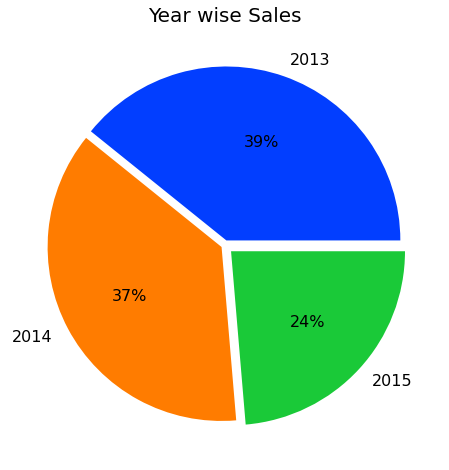

In [176]:
# show pie chart yearly sales
plt.figure(figsize=(10,8))                                        #setting fig size
plt.title('Year wise Sales',size = 20)                              # giving title name
explode = [0.03,0.02,0.05,]                             
colors = sns.color_palette('bright')                               # Seaborn color palette to plot pie chart
plt.pie(year_of_sales_df.Sales, labels=year_of_sales_df.Year, colors=colors,autopct='%.0f%%',explode = explode);

we observed that in 2013 having 39% sales and in 2014 having 37% sales but in 2015 sales rapidaly down to 24%

In [177]:
#relation between year in month of  total sales 
month_of_sales_df=df.groupby(['year_of_sales','month_of_sales'])['Sales'].sum().reset_index()
month_of_sales_df

,year_of_sales,month_of_sales,Sales
0,2013,1,180132207
1,2013,2,171534275
2,2013,3,201180369
3,2013,4,183431432
4,2013,5,185411063
5,2013,6,180702351
6,2013,7,208843882
7,2013,8,198042727
8,2013,9,178053963
9,2013,10,187662330


Text(0.5, 1.0, 'Distribution of sales by month in year ')

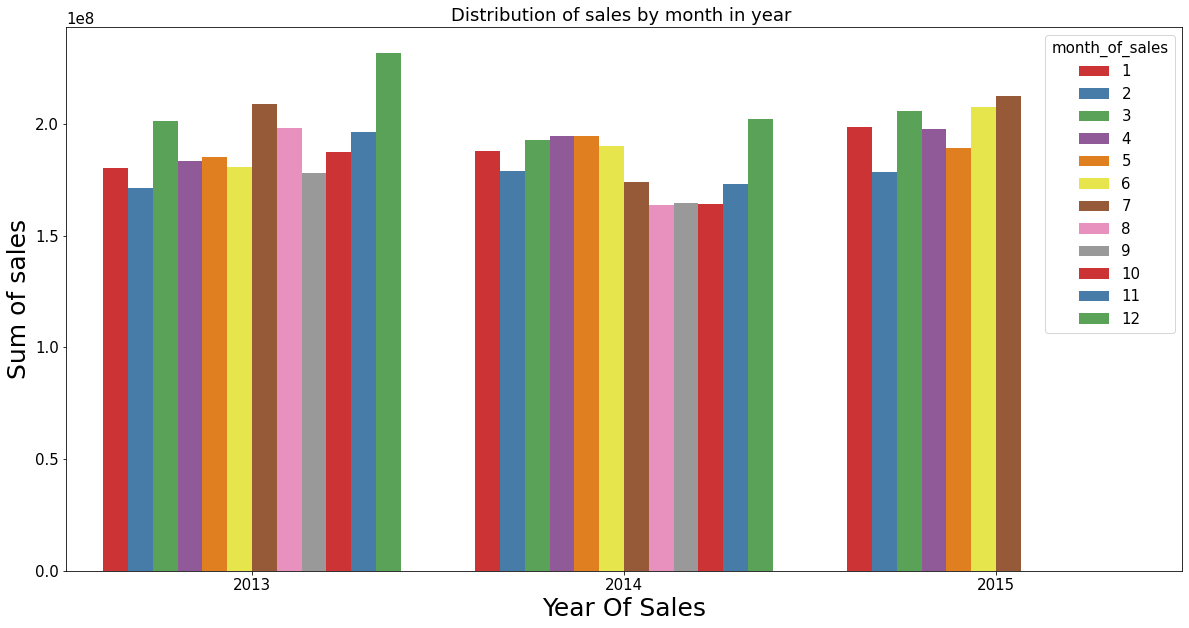

In [178]:
# show grouped bar graph year in monthly total sales(in million)
plt.figure(figsize=(20,10))
plt.rcParams['font.size'] = '15'
sns.barplot(x="year_of_sales",
           y="Sales",
           hue="month_of_sales",
           data=month_of_sales_df,palette='Set1')
plt.xlabel('Year Of Sales', size=25)
plt.ylabel('Sum of sales', size=25)
plt.title('Distribution of sales by month in year ')

we observed that in each year november and december having sales and in july month sales is high as compare to others month

In [179]:
# define categorical feature for shwoing relationship bewteen sales
categorical_features = df.describe(include=['object','category']).columns
categorical_features

Index(['StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'], dtype='object')

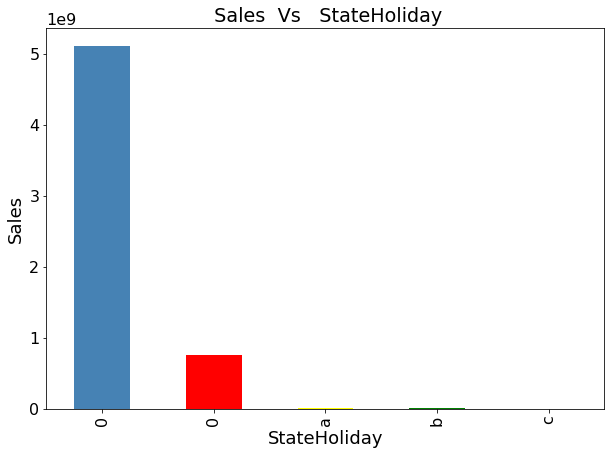

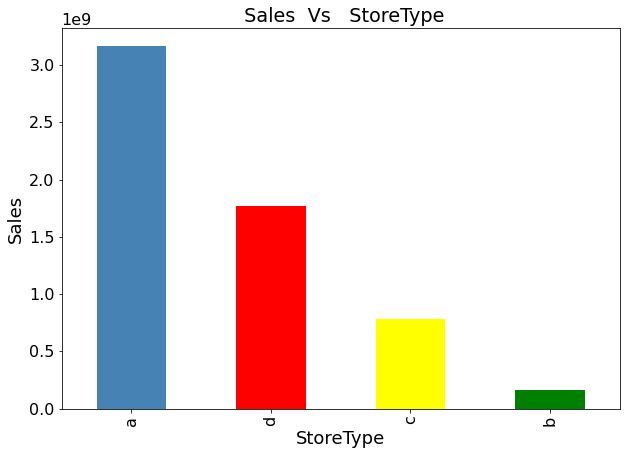

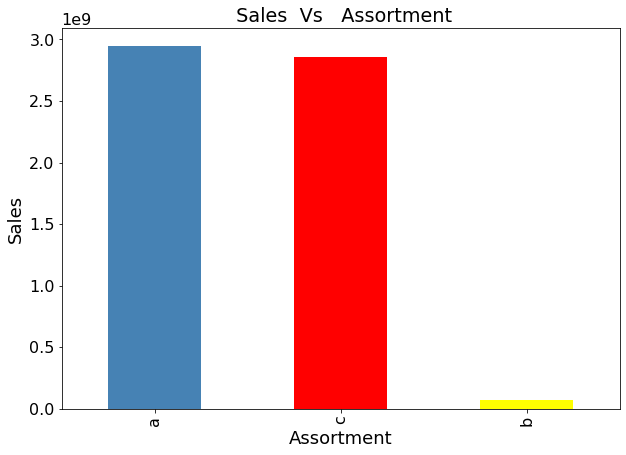

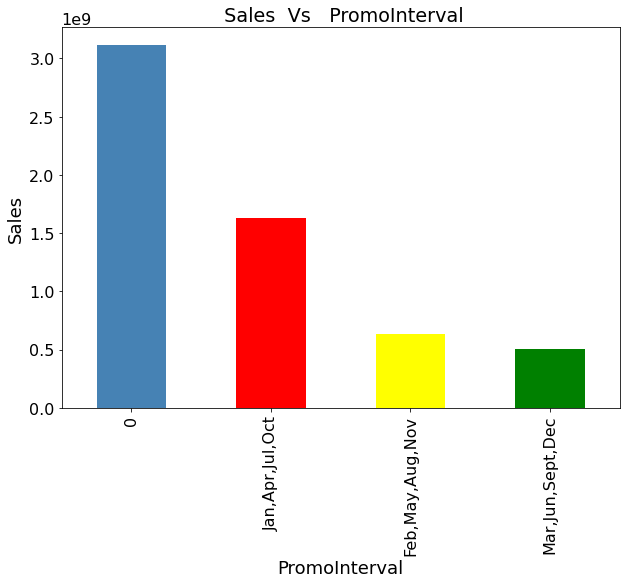

In [180]:
# bar graph representation of categorical feature with Sales
for col in categorical_features:
    counts = df.groupby([col])['Sales'].sum().sort_values(ascending = False)
    fig = plt.figure(figsize=(10,7))
    plt.rcParams['font.size'] = '16'

    ax = fig.gca()
    counts.plot.bar(ax = ax, color=['steelblue','red','yellow','green'])
    ax.set_title( ' Sales  Vs   '   +   col )
    ax.set_xlabel(col,fontsize=18) 
    ax.set_ylabel("Sales",fontsize=18)

we can observed that a store type have maximum sales , basic and extended assortment having more sales,prom interval jan,apr,jul,Oct is mostly maximize the sales 

In [181]:
df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'year_of_sales', 'month_of_sales',
       'day_of_sales'],
      dtype='object')

In [182]:
# converting data type into integer
df['CompetitionOpenSinceYear']=df['CompetitionOpenSinceYear'].astype(int)
df['CompetitionOpenSinceMonth']=df['CompetitionOpenSinceMonth'].astype(int)
df['Promo2SinceWeek']=df['Promo2SinceWeek'].astype(int)


In [183]:
# define new_col as variable which contain some important numerical features
new_col=['DayOfWeek','CompetitionOpenSinceMonth','CompetitionOpenSinceYear','Promo2SinceWeek','Promo2SinceYear']

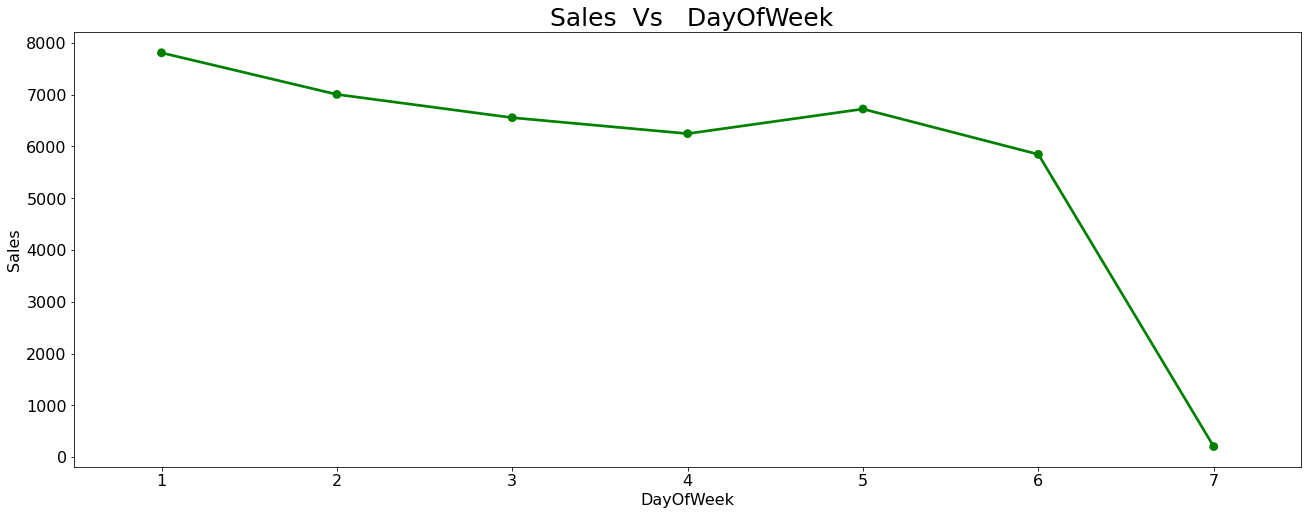

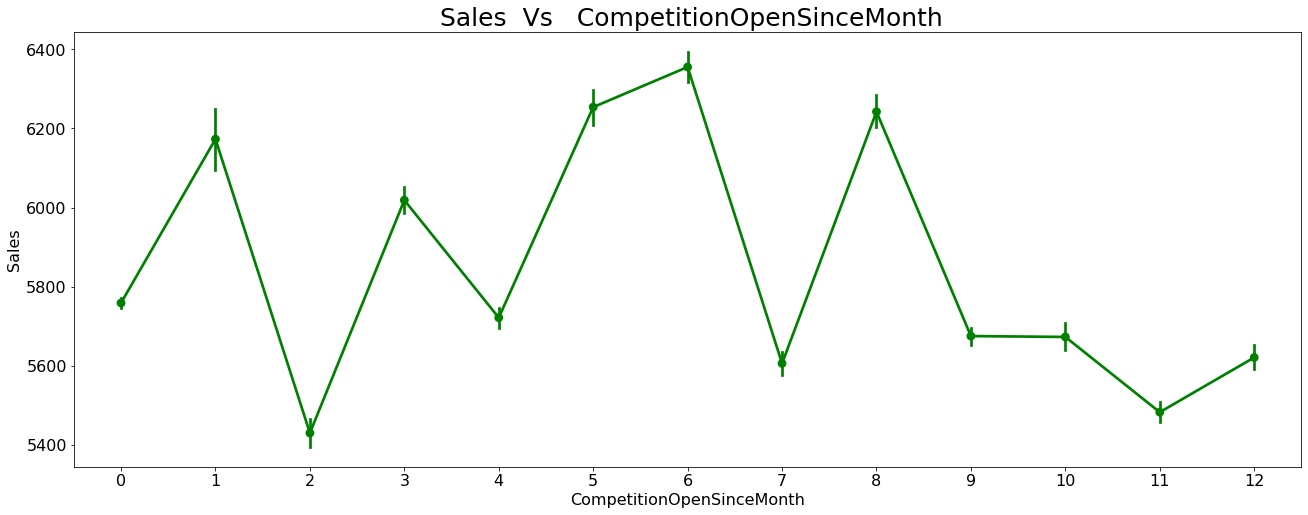

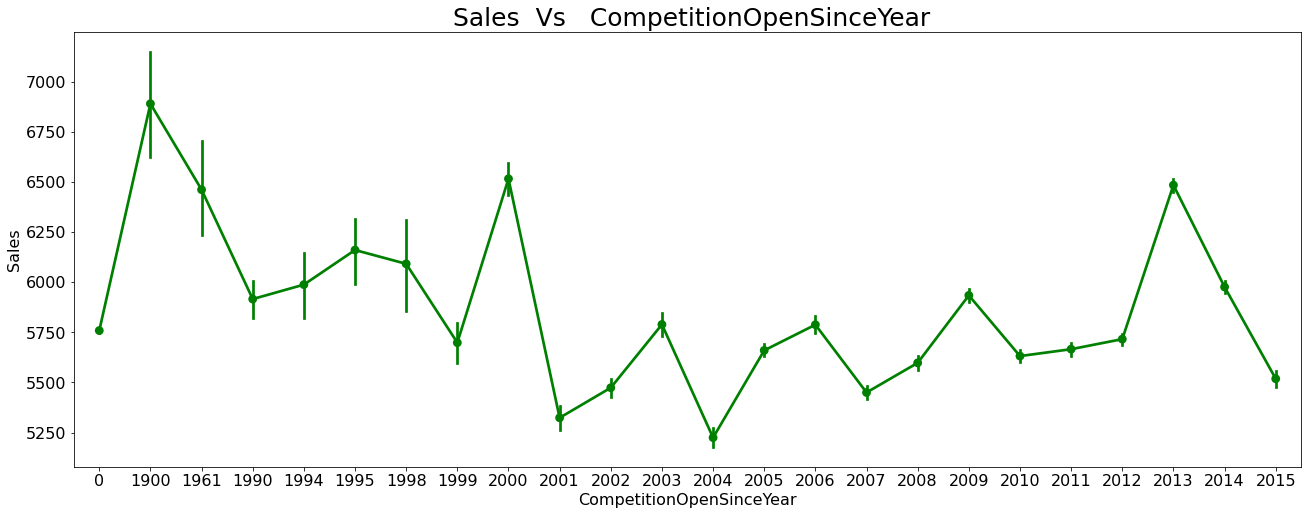

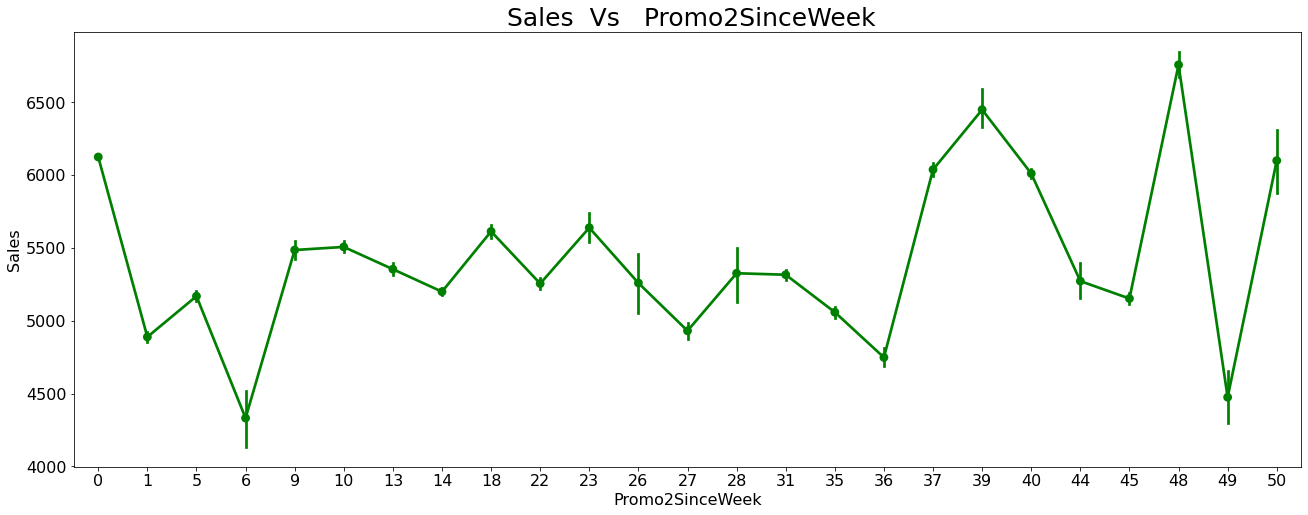

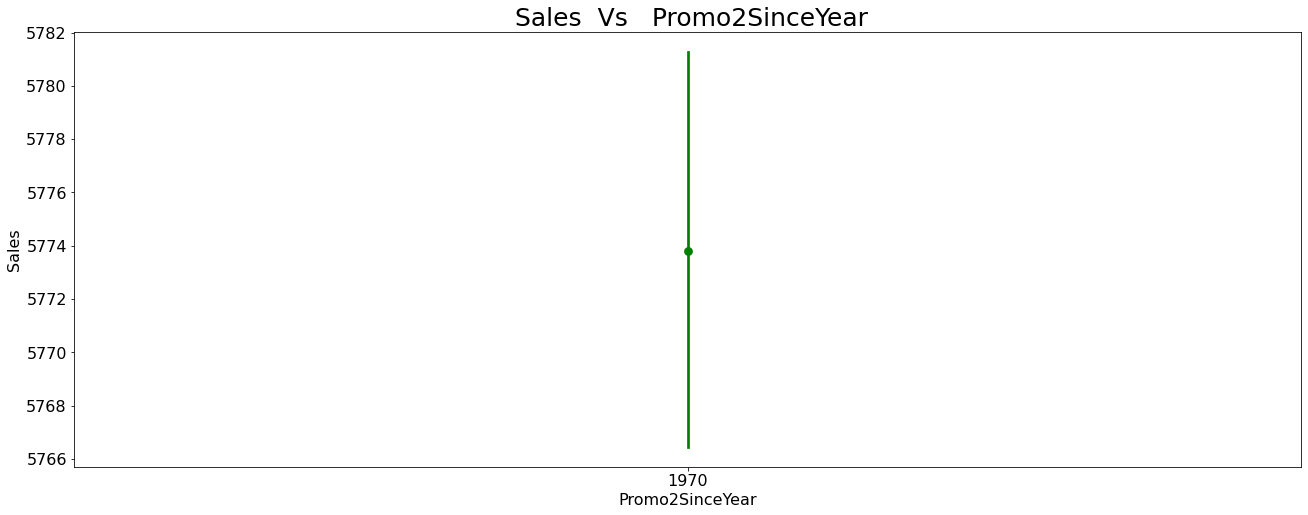

In [184]:
# line grpah show relationship between Sales and new_col features
for i in new_col:
   plt.figure(figsize = (22,8))
   plt.rcParams['font.size'] = '16'
   sns.pointplot(x=i,y = df['Sales'],data = df,color='g')
   plt.title(' Sales  Vs   '   +   i, size=25)

# **Checking Store Type detail with respect to Sales and Customers**

In [185]:
store_count=df.groupby('StoreType')['StoreType'].count()
sales_per_store = df.groupby('StoreType')['Sales'].sum()
customers_per_store = df.groupby('StoreType')['Customers'].sum()
avg_sales_per_store = df.groupby('StoreType')['Sales'].mean()

Text(0.5, 1.0, 'Average Sales per Store Type')

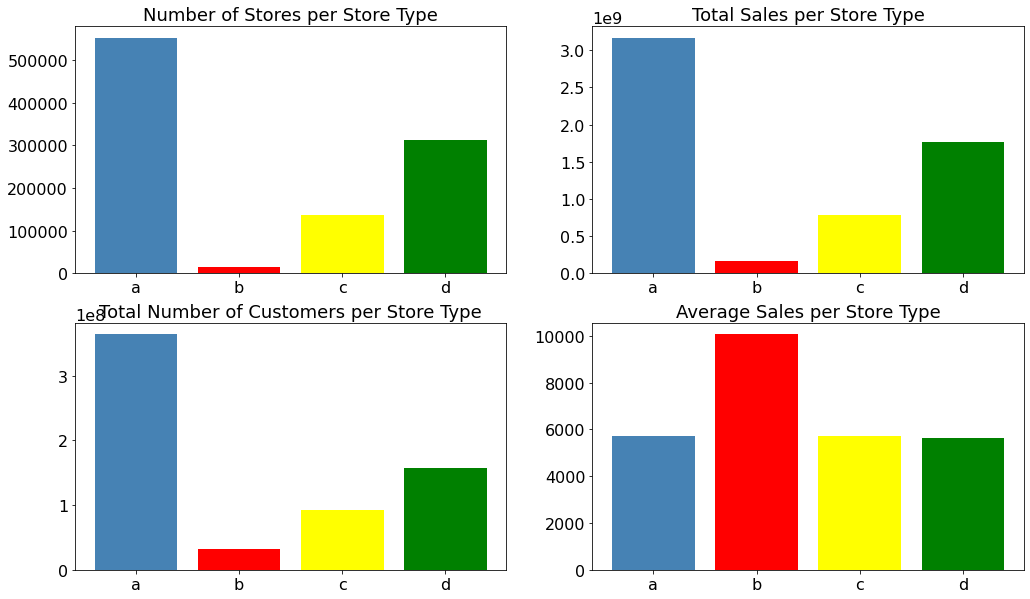

In [186]:
figure, axis = plt.subplots(2, 2,figsize=(17,10))
  
# For Number of Stores per Store Type
axis[0, 0].bar(store_count.index,store_count ,color=['steelblue','red','yellow','green'])
axis[0, 0].set_title("Number of Stores per Store Type",size=18)
  
# For Total Sales per Store Type
axis[0, 1].bar(sales_per_store.index,sales_per_store ,color=['steelblue','red','yellow','green'])
axis[0, 1].set_title("Total Sales per Store Type",size=18)

#Total Number of Customers per Store Type (in Millions)
axis[1, 0].bar(customers_per_store.index,customers_per_store,color=['steelblue','red','yellow','green'] )
axis[1, 0].set_title("Total Number of Customers per Store Type",size=18)

# for Average Sales per Store Type
axis[1, 1].bar(avg_sales_per_store.index,avg_sales_per_store,color=['steelblue','red','yellow','green'] )
axis[1, 1].set_title("Average Sales per Store Type",size=18)



# **Plot between Dayof Week and Open & promo.**

Text(0, 0.5, 'Store open/close Count')

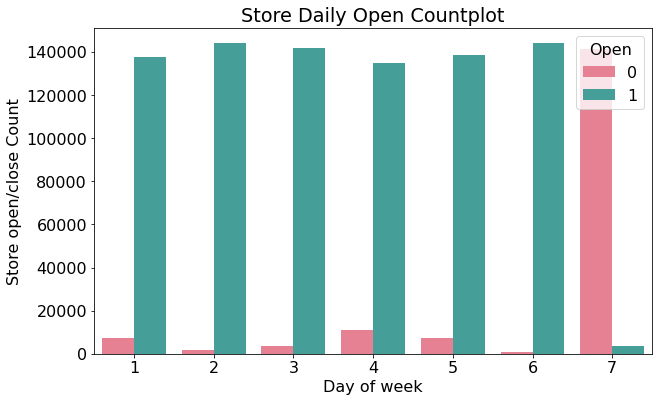

In [187]:
# ploting count plot 0 = closed, 1 = open
plt.figure(figsize=(10,6))
sns.countplot(x= 'DayOfWeek', hue='Open', data= df, palette="husl")
plt.title('Store Daily Open Countplot')
plt.xlabel('Day of week')
plt.ylabel('Store open/close Count')

Text(0, 0.5, 'Promo count')

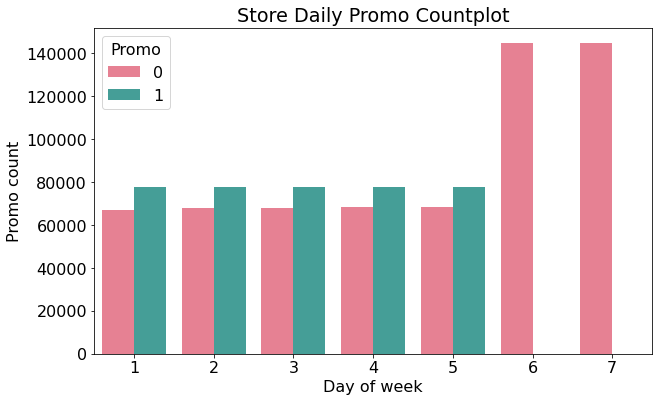

In [188]:
# ploting count plot 0 = store is not participating, 1 = store is participating
plt.figure(figsize=(10,6))
sns.countplot(x= 'DayOfWeek', hue='Promo', data= df, palette='husl')
plt.title('Store Daily Promo Countplot')

plt.xlabel('Day of week')
plt.ylabel('Promo count')

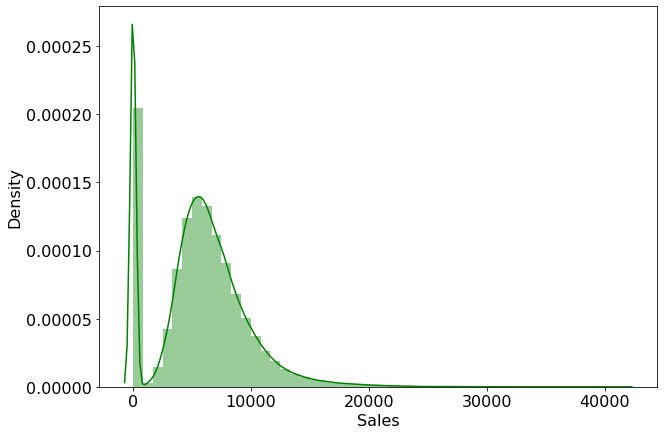

In [189]:
# Dependent variable 'Sales' distribution
plt.figure(figsize=(10,7))
plt.rcParams['font.size'] = '16'
sns.distplot(df['Sales'],color="g")

In [190]:
df.shape

(1017209, 20)

In [191]:
## make copy of date sets which having all values 

df_copy=df.copy()

# we have copy of our data set as df_copy which contain all value including 0 as we can use this data set for making different prediction in model 2

In [192]:
# to check how many rows having 0 is sales column 
len(df_copy[df_copy['Sales']==0])

172871

In [193]:
#removing zeros  from Sales column 
df=df[df['Sales']>0]

# after removing 0 in Sales ( dependent variable) we use this data set for making prediction for model 1

In [194]:
df.shape

(844338, 20)

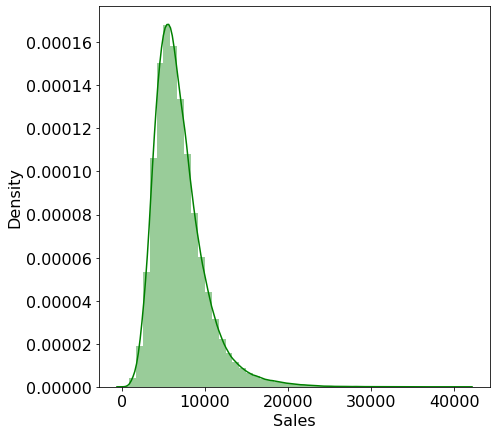

In [195]:
# after removing 0 values in sale distribution
plt.figure(figsize=(7,7))
sns.distplot(df['Sales'],color="g");

# ***REMOVING OUTLIER ***

In [196]:
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,year_of_sales,month_of_sales,day_of_sales
count,844338.000000,844338.000000,844338.000000,844338.000000,844338.0,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.000000,844338.0,844338.000000,844338.000000,844338.000000
mean,558.421374,3.520350,6955.959134,762.777166,1.0,0.446356,0.193578,5444.025402,4.926482,1369.692738,0.498670,11.596159,1970.0,2013.831945,5.845774,15.835706
std,321.730861,1.723712,3103.815515,401.194153,0.0,0.497114,0.395102,7804.387332,4.283634,935.556484,0.499999,15.308101,0.0,0.777271,3.323959,8.683392
min,1.000000,1.000000,46.000000,8.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.0,2013.000000,1.000000,1.000000
25%,280.000000,2.000000,4859.000000,519.000000,1.0,0.000000,0.000000,700.000000,0.000000,0.000000,0.000000,0.000000,1970.0,2013.000000,3.000000,8.000000
50%,558.000000,3.000000,6369.000000,676.000000,1.0,0.000000,0.000000,2320.000000,4.000000,2006.000000,0.000000,0.000000,1970.0,2014.000000,6.000000,16.000000
75%,837.000000,5.000000,8360.000000,893.000000,1.0,1.000000,0.000000,6880.000000,9.000000,2011.000000,1.000000,22.000000,1970.0,2014.000000,8.000000,23.000000
max,1115.000000,7.000000,41551.000000,7388.000000,1.0,1.000000,1.000000,75860.000000,12.000000,2015.000000,1.000000,50.000000,1970.0,2015.000000,12.000000,31.000000


# From Above Table we found there is outliers in Sales, customer and competitionDistance ( from 5 number theory)and this are important feature for analyis so we decided to remove outlier 

In [197]:
fix_col=['Sales','Customers','CompetitionDistance']

In [198]:
#Defining percentile range and calulating IQR
Q1 = df[fix_col].quantile(0.25)    #25% percentile
Q3 = df[fix_col].quantile(0.75)    #75% percentile
IQR = Q3 - Q1     #IQR (Inter Quartile Range)
print(IQR)

Sales                  3501.0
Customers               374.0
CompetitionDistance    6180.0
dtype: float64


In [199]:
df = df[~((df[fix_col] < (Q1 - 1.5 * IQR)) |(df[fix_col] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [200]:
# after removing outlier to check description of data
df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,year_of_sales,month_of_sales,day_of_sales
count,713769.000000,713769.000000,713769.000000,713769.000000,713769.0,713769.000000,713769.000000,713769.000000,713769.000000,713769.000000,713769.000000,713769.000000,713769.0,713769.000000,713769.000000,713769.000000
mean,557.160090,3.538431,6469.041340,696.045994,1.0,0.436695,0.192645,3515.150546,4.965643,1368.084237,0.533482,12.365159,1970.0,2013.832849,5.808573,15.861881
std,324.335318,1.708969,2311.230438,250.716405,0.0,0.495977,0.394377,3783.111008,4.315738,936.159654,0.498878,15.515798,0.0,0.778436,3.308818,8.645713
min,1.000000,1.000000,133.000000,18.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1970.0,2013.000000,1.000000,1.000000
25%,277.000000,2.000000,4764.000000,511.000000,1.0,0.000000,0.000000,650.000000,0.000000,0.000000,0.000000,0.000000,1970.0,2013.000000,3.000000,8.000000
50%,555.000000,4.000000,6174.000000,657.000000,1.0,0.000000,0.000000,2100.000000,4.000000,2006.000000,1.000000,1.000000,1970.0,2014.000000,6.000000,16.000000
75%,844.000000,5.000000,7912.000000,850.000000,1.0,1.000000,0.000000,5000.000000,9.000000,2011.000000,1.000000,22.000000,1970.0,2014.000000,8.000000,23.000000
max,1115.000000,7.000000,13611.000000,1454.000000,1.0,1.000000,1.000000,15770.000000,12.000000,2015.000000,1.000000,50.000000,1970.0,2015.000000,12.000000,31.000000


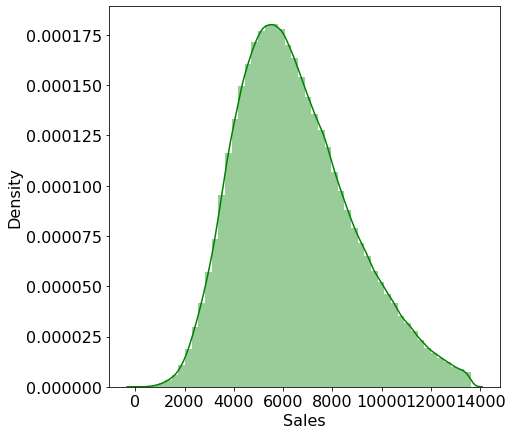

In [201]:
# after removing outlier  we can check the distribution of Sales column and result found quite normally distributed 
plt.figure(figsize=(7,7))
sns.distplot(df['Sales'],color="g");

In [202]:
# after removing outlier to check shape of data
df.shape

(713769, 20)

In [203]:
numerical_columns=df.describe().columns
numerical_columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'year_of_sales', 'month_of_sales', 'day_of_sales'],
      dtype='object')

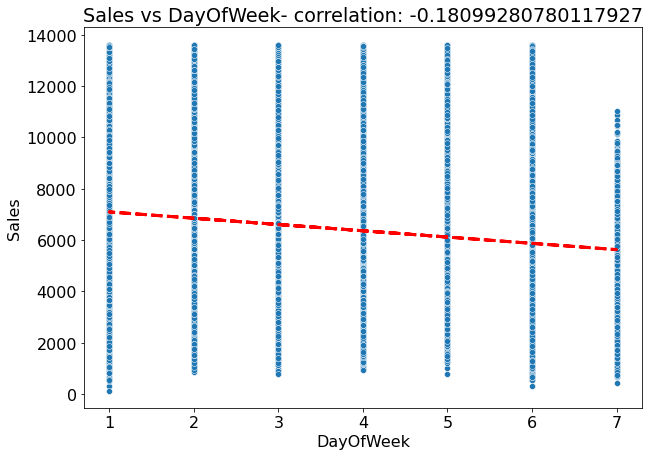

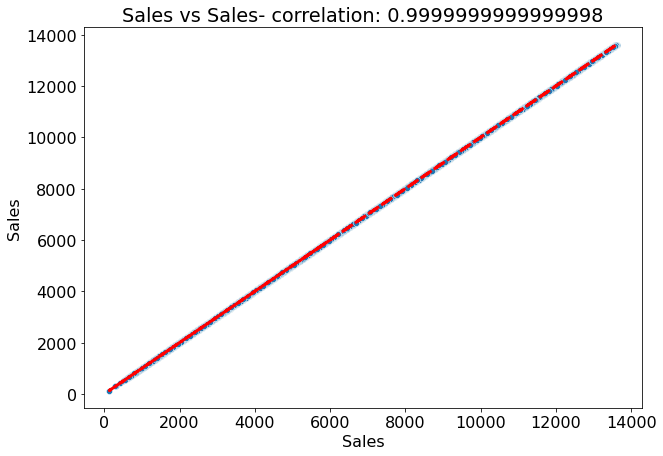

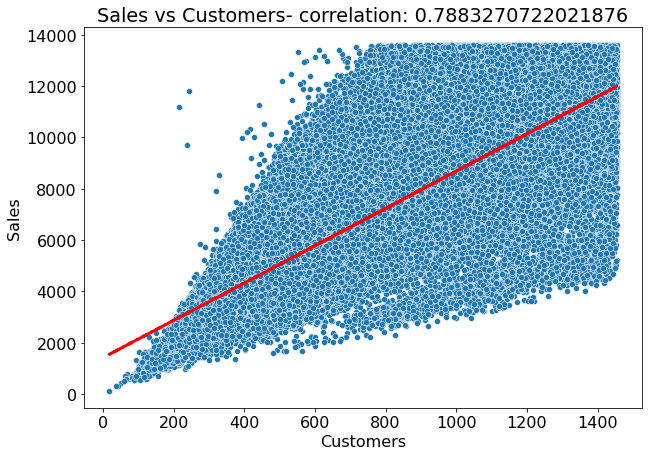

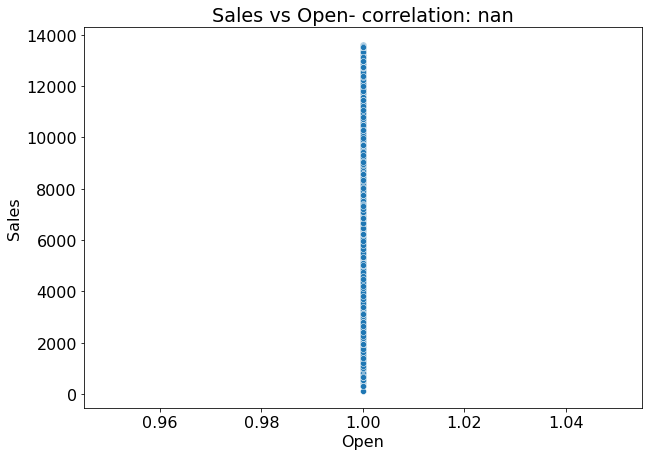

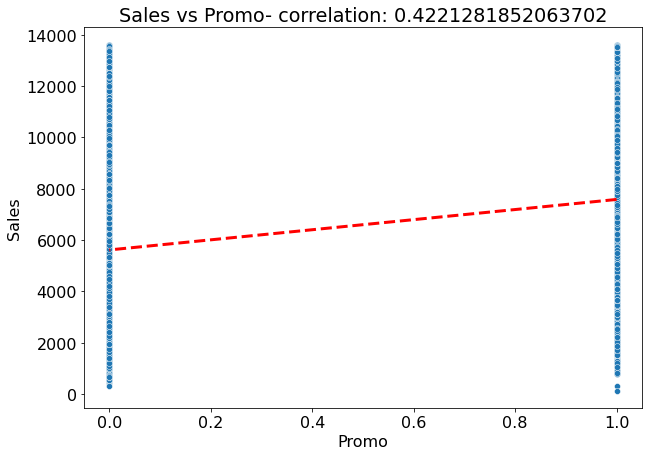

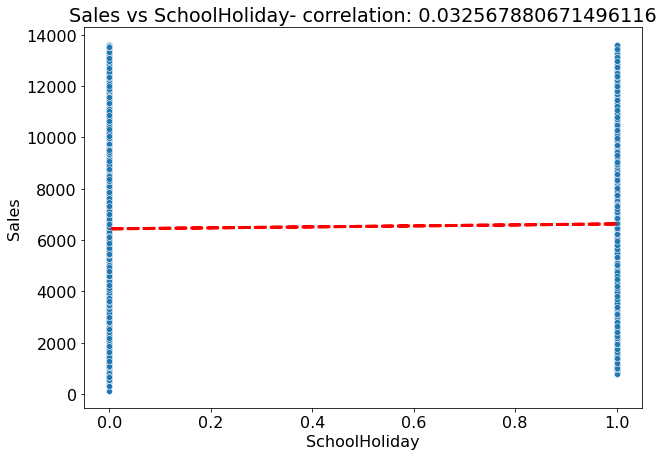

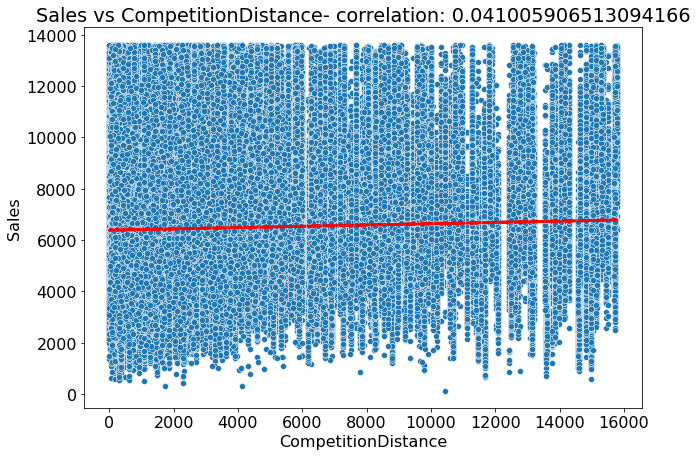

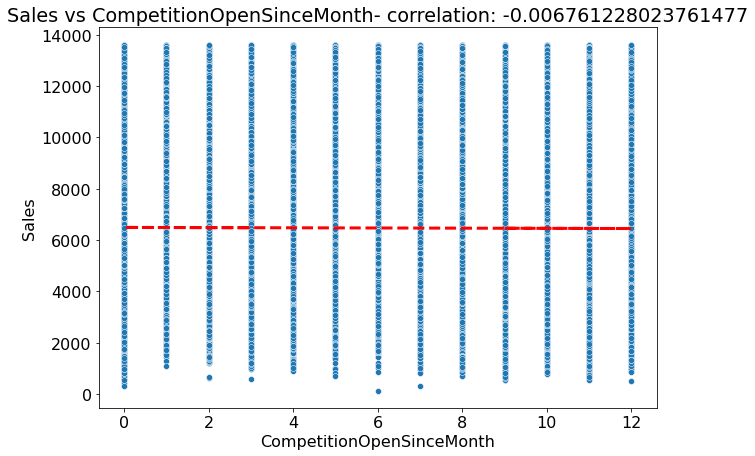

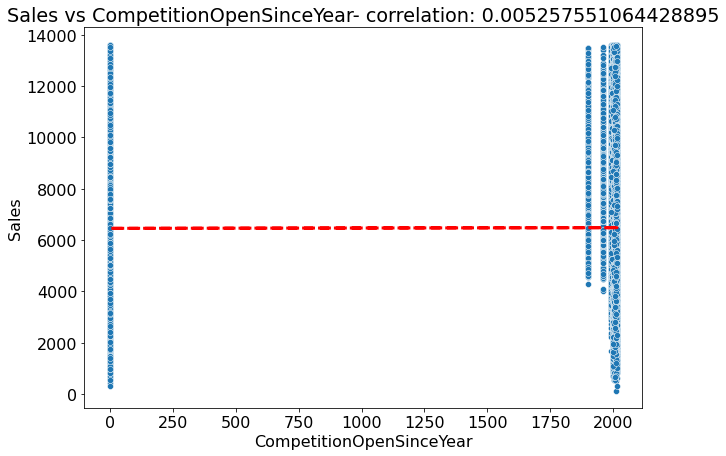

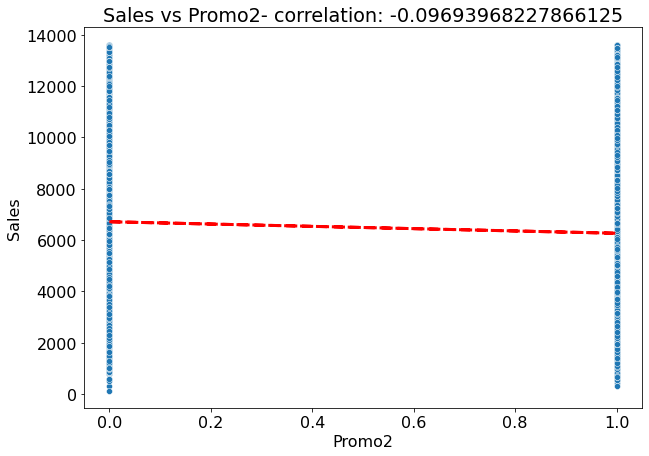

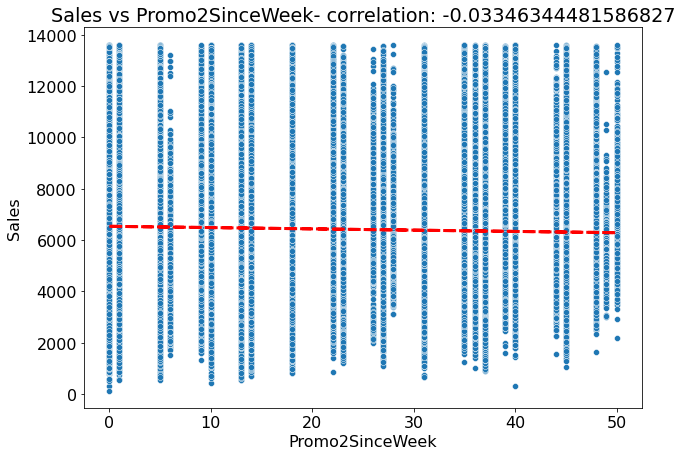

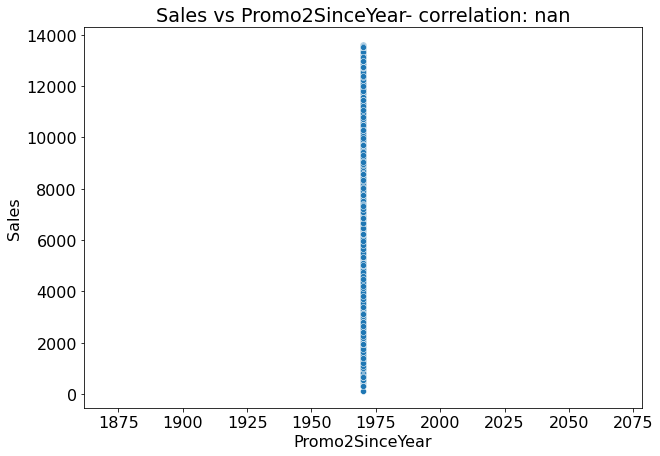

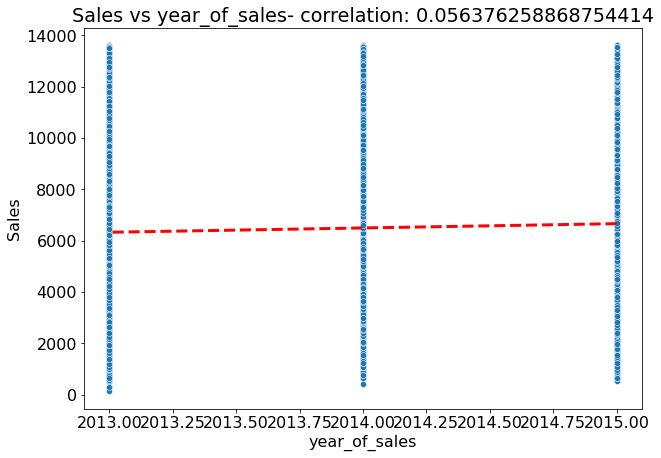

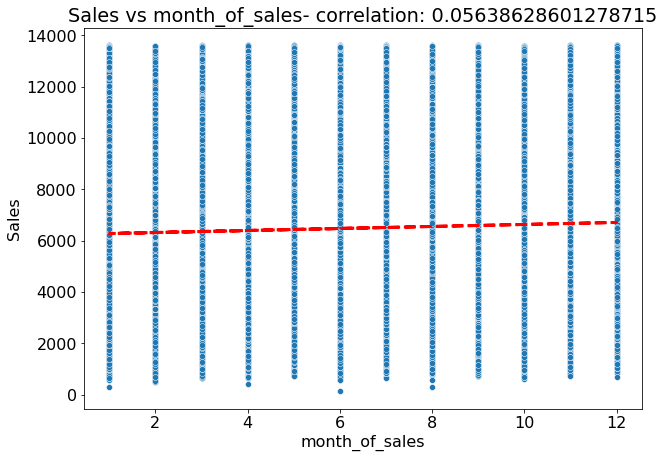

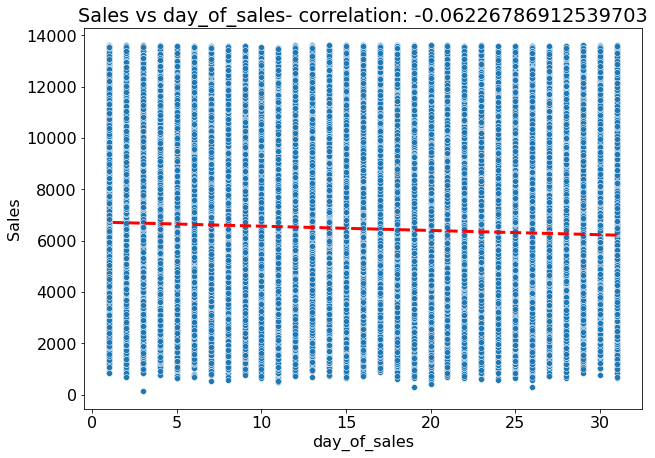

In [204]:
# scater plot with corelation between sales and numerical columns and its distribution
for i in numerical_columns[1:]:
   plt.figure(figsize = (10,7))
   plt.rcParams['font.size'] = '16'
   feature = df[i]
   label = df['Sales']
   
   correlation = feature.corr(label)
   sns.scatterplot(x=i,y = df['Sales'],data = df)
   plt.title('Sales vs ' + i + '- correlation: ' + str(correlation))
   z = np.polyfit(df[i], df['Sales'], 1)
   slope = np.poly1d(z)(df[i])

   plt.plot(df[i], slope, "r--", lw=3)


## **CORRELATION**

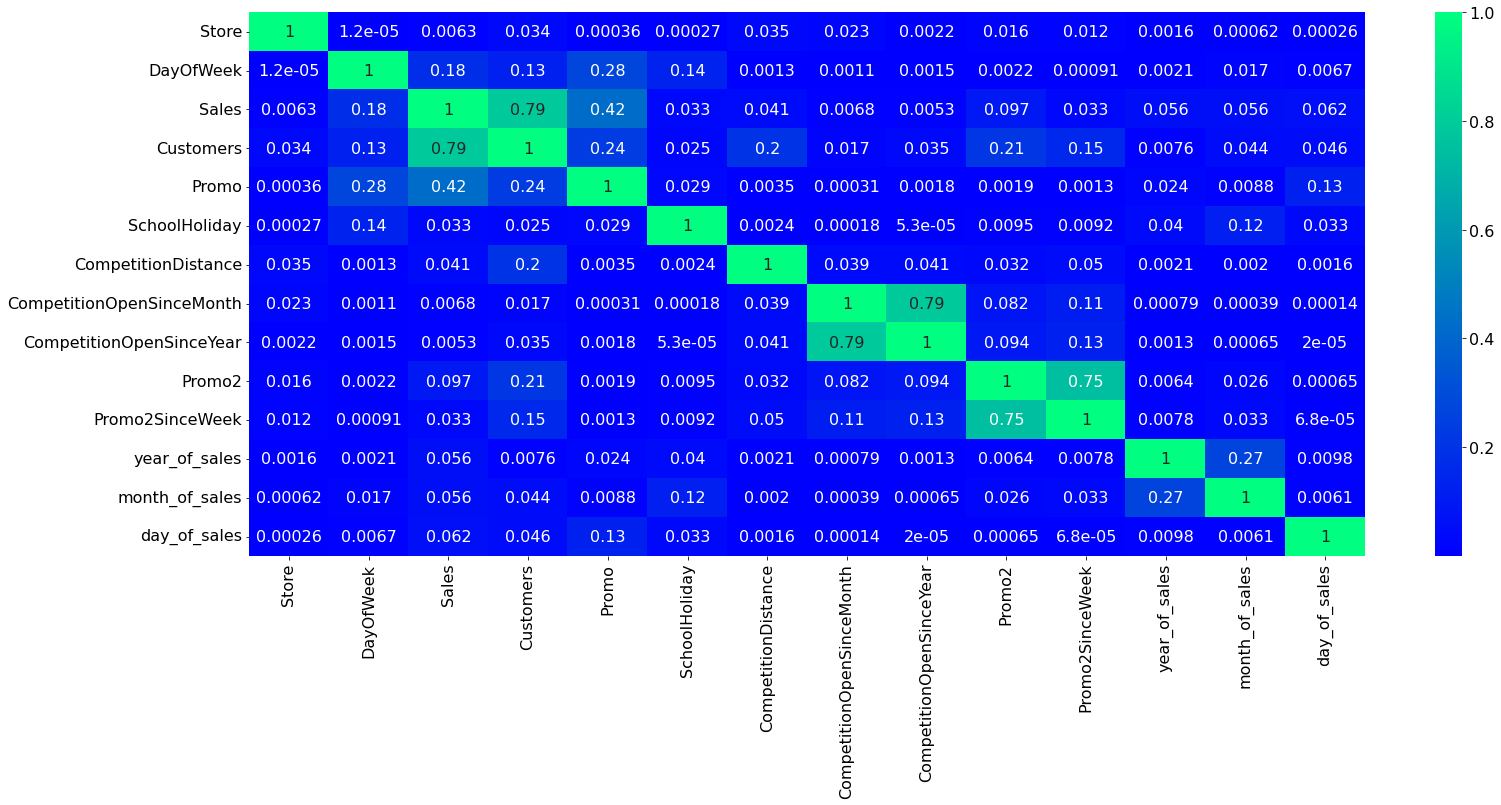

In [205]:
# correlation matrix, shown by heatmap
plt.figure(figsize=(25,10))
plt.rcParams['font.size'] = '16'

correlation = df.drop(['Open','Promo2SinceYear'],axis=1).corr() #heatmap had problems so we dropped some columns
sns.heatmap(abs(correlation), annot=True, cmap='winter',fmt='.2g')

# **Multicollinearity**

In [206]:
# checking Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [207]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Sales']]])

,variables,VIF
0,Store,1.004141
1,DayOfWeek,1.109107
2,Customers,1.178647
3,Open,0.000000
4,Promo,1.158751
5,SchoolHoliday,1.036152
6,CompetitionDistance,1.054894
7,CompetitionOpenSinceMonth,2.635701
8,CompetitionOpenSinceYear,2.642853
9,Promo2,2.306729


In [208]:

### Data encoding #'StateHoliday', 'StoreType', 'Assortment', 'PromoInterval'

#label encoding
encoders_nums = {"StateHoliday":{"0":0,"a":1,"b":2,"c":3},
                 "StoreType":{"a":1,"b":2,"c":3,"d":4},
                 "Assortment":{"a": 1, "b": 2,"c":3},
                 "PromoInterval":{"0":0,"Jan,Apr,Jul,Oct":1,"Feb,May,Aug,Nov":2,"Mar,Jun,Sept,Dec":3},
                }

df= df.replace(encoders_nums)


In [209]:
#Checking datadrame after encoding
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year_of_sales,month_of_sales,day_of_sales
0,1,5,5263,555,1,1,0,1,3,1,1270.0,9,2008,0,0,1970,0,2015,7,31
1,2,5,6064,625,1,1,0,1,1,1,570.0,11,2007,1,13,1970,1,2015,7,31
2,3,5,8314,821,1,1,0,1,1,1,14130.0,12,2006,1,14,1970,1,2015,7,31
5,6,5,5651,589,1,1,0,1,1,1,310.0,12,2013,0,0,1970,0,2015,7,31
7,8,5,8492,833,1,1,0,1,1,1,7520.0,10,2014,0,0,1970,0,2015,7,31


In [210]:
df.shape

(713769, 20)

### After encoding categorical columns we check multicollinearity 
### as our categorical columns can also affect our dependent variable 

In [211]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [212]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Sales']]])

,variables,VIF
0,Store,1.005298
1,DayOfWeek,1.109396
2,Customers,1.214007
3,Open,0.000000
4,Promo,1.160918
5,StateHoliday,1.000403
6,SchoolHoliday,1.036365
7,StoreType,1.159253
8,Assortment,1.127954
9,CompetitionDistance,1.131100


# **FEATURE ENGINEERING**
What is feature engineering?

Its playing around with features to acheive below goals.

Preparing the proper input dataset, compatible with the machine learning algorithm requirements.

Improve the performance of machine learning models.

In [213]:
#Normalization/scaling of data - understanding scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scaled_data

array([[0.00000000e+00, 6.66666667e-01, 3.80620270e-01, ...,
        1.00000000e+00, 5.45454545e-01, 1.00000000e+00],
       [8.97666068e-04, 6.66666667e-01, 4.40050453e-01, ...,
        1.00000000e+00, 5.45454545e-01, 1.00000000e+00],
       [1.79533214e-03, 6.66666667e-01, 6.06989168e-01, ...,
        1.00000000e+00, 5.45454545e-01, 1.00000000e+00],
       ...,
       [6.89407540e-01, 1.66666667e-01, 3.63703814e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [8.50089767e-01, 1.66666667e-01, 3.23341742e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.83842011e-01, 1.66666667e-01, 4.32408369e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [214]:
#converting data back to pandas dataframe
df_scaled = pd.DataFrame(scaled_data)
df_scaled.columns = df.columns

# **MODEL TRAINNING**

# **Model 1:it has cleaned data with 713769 rows and 20 columns**

In [215]:
from scipy.stats import zscore
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score as r2, mean_squared_error 
import math
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix,classification_report

In [216]:
df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'year_of_sales', 'month_of_sales',
       'day_of_sales'],
      dtype='object')

In [217]:
# defining X as idependent variable and y as dependent variable for our model
X = df_scaled.drop(['Sales','Store','Promo2SinceYear'],axis = 1) # dropping few columns which are not necessary
y = df_scaled['Sales']

In [218]:
# Train test split 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# **Linear Regression**

In [219]:
#Importing neccesary packages
from sklearn.linear_model import LinearRegression
from sklearn import metrics
print(X_train.shape)
print(X_test.shape)

(571015, 17)
(142754, 17)


In [220]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [221]:
##Checking accuracy on train data

accuracy = lr.score(X_train,y_train)
print(accuracy*100,'%')

76.2636735517083 %


In [222]:
#Checking accuracy on test data
accuracy = lr.score(X_test,y_test)
print(accuracy*100,'%')

76.28604956078402 %


In [223]:
y_pred = lr.predict(X_test)

metrics.r2_score(y_pred,y_test)

0.6904198040625865

In [224]:
lr.intercept_

-0.03465005942665589

In [225]:
lr.coef_

array([-7.95579010e-03,  7.95205343e-01, -2.22044605e-16,  7.73586389e-02,
       -1.75535203e-01,  1.43246192e-03,  6.07686969e-02,  2.47474817e-02,
        1.07208218e-01,  1.88127947e-03,  4.86434031e-03,  1.66303228e-02,
        5.52065433e-02, -3.62340390e-02,  2.54970700e-02,  2.37484157e-02,
        2.12026323e-03])

In [226]:
sales_mean=df_scaled['Sales'].mean()
sales_mean

0.4701024884779007

In [227]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean    
print("RMPSE :",RMPSE)

print("r2-Score : " ,metrics.r2_score(y_test,y_pred))



MSE : 0.0069929135878451084
RMSE : 0.08362364251720387
RMPSE : 0.17788385419520064
r2-Score :  0.7628604956078402


# **Lasso Regression**

In [228]:
# Lasso
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.02 , max_iter= 1000)

lasso.fit(X_train, y_train)


Lasso(alpha=0.02)

In [229]:
y_train_pred = lasso.predict(X_train)
print("RMSE:",np.sqrt(mean_squared_error(y_train,y_train_pred)))
print("R-Square: " ,r2_score(y_train,y_train_pred))

RMSE: 0.15077087547225698
R-Square:  0.22641964930000846


In [230]:
y_test_pred = lasso.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_test_pred)))

RMPSE=np.sqrt(mean_squared_error(y_test,y_test_pred))/sales_mean    
print("RMPSE :",RMPSE)

print("R2-Score: ",r2_score(y_test,y_test_pred))

RMSE: 0.1508990140297401
RMPSE : 0.32099173633035083
R2-Score:  0.22781999723088187


# **Lasso with hypertuning**

In [231]:
from sklearn.model_selection import GridSearchCV

In [232]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,50]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-10, 1e-08, 1e-05, 0.0001, 0.001, 0.01,
                                   0.1, 1, 5, 10, 20, 30, 50]},
             scoring='neg_mean_squared_error')

In [233]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-10}

Using  {'alpha': 1e-10}  the negative mean squared error is:  -0.006975558965342288


In [234]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [235]:
MSE  = mean_squared_error(y_test,y_pred_lasso)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :" ,RMPSE)


r2 = r2_score(y_test, y_pred_lasso)
print("R2 :" ,r2)

MSE : 0.006992913593439942
RMSE : 0.08362364255065634
RMPSE : 0.17788385426636058
R2 : 0.7628604954181115


# **Ridge Regression**

In [236]:
# Ridge
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.02 , max_iter= 1000)
ridge.fit(X_train, y_train)

Ridge(alpha=0.02, max_iter=1000)

In [237]:
y_train_pred = ridge.predict(X_train)
print("RMSE:",np.sqrt(mean_squared_error(y_train,y_train_pred)))
print("R-score: ",r2_score(y_train,y_train_pred))

RMSE: 0.0835163479116635
R-score:  0.7626367355055031


In [238]:
y_test_pred = ridge.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_test_pred)))

RMPSE=np.sqrt(mean_squared_error(y_test,y_test_pred))/sales_mean     
print("RMPSE :",RMPSE)

print("R-Square: ",r2_score(y_test,y_test_pred))

RMSE: 0.08362364356004612
RMPSE : 0.1778838564135302
R-Square:  0.7628604896932666


# **Decission Tree**

In [239]:
# decission tree
from sklearn.metrics import  mean_squared_error 
from sklearn.tree import DecisionTreeRegressor

decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
y_train_dt = decision_tree.predict(X_train)

MSE  = mean_squared_error(y_test, y_pred_dt)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean    
print("RMPSE :",RMPSE)

r2 = r2_score(y_test, y_pred_dt)
print("R2 :" ,r2)

MSE : 0.007465159086358836
RMSE : 0.08640115211245065
RMPSE : 0.18379216070989238
R2 : 0.7468459886269976


# **Random Forest**

In [240]:
# Random forest
# Fitting Random Forest Regression to the dataset
# import the regressor
random_forest=RandomForestRegressor(n_estimators =100,max_depth=10)
random_forest.fit(X_train, y_train)
y_pred_rf=random_forest.predict(X_test)
MSE  = mean_squared_error(y_test, y_pred_rf)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean
print("RMPSE :",RMPSE)

r2 = r2_score(y_test, y_pred_rf)
print("R2 :" ,r2)

MSE : 0.0041673032712785385
RMSE : 0.06455465336657411
RMPSE : 0.13732038214813405
R2 : 0.8586809031759612


## **MODEL-2: BY TAKING WHOLE DATE SET INCLUDING 0 SALES**

In [241]:
df_copy.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year_of_sales,month_of_sales,day_of_sales
0,1,5,5263,555,1,1,0,1,c,a,1270.0,9,2008,0,0,1970,0,2015,7,31
1,2,5,6064,625,1,1,0,1,a,a,570.0,11,2007,1,13,1970,"Jan,Apr,Jul,Oct",2015,7,31
2,3,5,8314,821,1,1,0,1,a,a,14130.0,12,2006,1,14,1970,"Jan,Apr,Jul,Oct",2015,7,31
3,4,5,13995,1498,1,1,0,1,c,c,620.0,9,2009,0,0,1970,0,2015,7,31
4,5,5,4822,559,1,1,0,1,a,a,29910.0,4,2015,0,0,1970,0,2015,7,31


In [242]:
#original shape of our data including Zeroes
df_copy.shape

(1017209, 20)

In [243]:
# Encoding our data set by get dummies
df_copy.drop(['Store'],inplace=True,axis=1)
df_copy=pd.get_dummies(df_copy,drop_first=True)


In [244]:
# to check data shape after encoding
df_copy.shape

(1017209, 27)

In [245]:
# lets check columns names after encoding
df_copy.columns

Index(['DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'year_of_sales', 'month_of_sales', 'day_of_sales',
       'StateHoliday_0', 'StateHoliday_a', 'StateHoliday_b', 'StateHoliday_c',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_b',
       'Assortment_c', 'PromoInterval_Feb,May,Aug,Nov',
       'PromoInterval_Jan,Apr,Jul,Oct', 'PromoInterval_Mar,Jun,Sept,Dec'],
      dtype='object')

In [246]:
# define dependent variable as y and indpendent variable as x
X = df_copy.drop(['Sales','Promo2SinceYear'],axis = 1)
y = df_copy['Sales']

In [247]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# **Linear Regression**

In [248]:
#Importing neccesary packages
from sklearn.linear_model import LinearRegression
from sklearn import metrics
print(X_train.shape)
print(X_test.shape)

(813767, 25)
(203442, 25)


In [249]:
#fitting in model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [250]:
##Checking accuracy on train data
accuracy = lr.score(X_train,y_train)
print(accuracy*100,'%')

90.0988860234705 %


In [251]:
#Checking accuracy on test data
accuracy = lr.score(X_test,y_test)
print(accuracy*100,'%')

90.10435967698389 %


In [252]:
#Predicting on test data
y_pred = lr.predict(X_test)

In [253]:
#Dependent variable cofficient
lr.intercept_

-303104.44427846797

In [254]:
#Independent variable cofficient
lr.coef_

array([-4.88828456e+01,  7.25339215e+00,  8.52603973e+02,  1.11718489e+03,
        4.63668702e+01,  2.08598411e-02, -3.80666851e+00,  5.12431337e-02,
        2.72976143e+01,  7.38857110e+00,  1.50176024e+02,  2.91244231e+01,
        1.10251560e+00,  1.52752454e+02, -4.40609949e+02, -6.15876458e+02,
       -1.36448166e+02, -3.09319896e+03, -1.06071110e+02,  9.20846498e+02,
       -4.02889428e+03,  2.87693498e+02,  3.84054508e+01,  9.72155893e+01,
       -1.08323426e+02])

In [255]:
sales_mean_copy=df_copy['Sales'].mean()
#sales_mean

In [256]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE = RMSE/sales_mean_copy
print("RMPSE :" ,RMPSE)

print("r2-Score : " ,metrics.r2_score(y_test,y_pred))

MSE : 1474341.1765290194
RMSE : 1214.2245165244437
RMPSE : 0.21029833500990097
r2-Score :  0.9010435967698389


# **Lasso Regression**

In [257]:
# Importing Lasso from sklearn
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.02 , max_iter= 1000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.02)

In [258]:
#predicting on train data
y_train_pred1 = lasso.predict(X_train)
print("RMSE:",np.sqrt(mean_squared_error(y_train,y_train_pred1)))
print("R-Square : " ,r2_score(y_train,y_train_pred1))

RMSE: 1210.6313753858046
R-Square :  0.9009888402797609


In [259]:
#predicting on test data
y_test_pred1 = lasso.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_test_pred1)))

RMPSE=np.sqrt(mean_squared_error(y_test,y_test_pred1))/sales_mean_copy     
print("RMPSE :",RMPSE)

print("R-Square : " ,r2_score(y_test,y_test_pred1))

RMSE: 1214.2256947919288
RMPSE : 0.21029853908063662
R-Square :  0.9010434047177639


# **Lasso cross validation and hyperparameter tuning**

In [260]:
from sklearn.model_selection import GridSearchCV

In [ ]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,50]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error(y_test,y_pred_lasso)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean_copy
print("RMPSE :" ,RMPSE)


r2 = r2_score(y_test, y_pred_lasso)
print("R2 :" ,r2)

# **Ridge Regression**

In [ ]:
# Importing Ridge from sklearn
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.02 , max_iter= 1000)
ridge.fit(X_train, y_train)

In [ ]:
#Predicting on train data
y_train_pred1 = ridge.predict(X_train)
print("RMSE:",np.sqrt(mean_squared_error(y_train,y_train_pred1)))
print("R-Square : " ,r2_score(y_train,y_train_pred1))

In [ ]:
#Predicting on test data
y_test_pred1 = ridge.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test,y_test_pred1)))

RMPSE=np.sqrt(mean_squared_error(y_test,y_test_pred1))/sales_mean_copy     
print("RMPSE :",RMPSE)

print("R-Square : " ,r2_score(y_test,y_test_pred1))

# **Decision Tree**

In [ ]:
from sklearn.metrics import  mean_squared_error 
from sklearn.tree import DecisionTreeRegressor

decision_tree=DecisionTreeRegressor(max_depth=5)
decision_tree.fit(X_train, y_train)
y_pred_dt1 = decision_tree.predict(X_test)
y_train_dt1 = decision_tree.predict(X_train)

MSE  = mean_squared_error(y_test, y_pred_dt1)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean    
print("RMPSE :",RMPSE)

r2 = r2_score(y_test, y_pred_dt1)
print("R2 :" ,r2)

# **Random Forest**

In [ ]:
#sales_mean=df_copy['Sales'].mean()
#sales_mean

In [ ]:
# Defining variable for Random forest and setting parameters
random_forest=RandomForestRegressor(n_estimators =100,max_depth=10)
#fitting data in model
random_forest.fit(X_train, y_train)
#predicting on test data
y_pred=random_forest.predict(X_test)

MSE  = mean_squared_error(y_test, y_pred)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

RMPSE=RMSE/sales_mean_copy
print("RMPSE :",RMPSE)

r2 = r2_score(y_test, y_pred)
print("R2 :" ,r2)

#**Conclusion on Modeling**

1. We have built two type of model  based on Data sets 

   Model 1: Excluding zero sales 

   Model 2 : Inclding zero sales 

2. We train our model on  Algorithm  like linear Regression, Lasso Regression, Ridge Regression, Decission Tree Regression, Random Forest Regression and also Lasso with Hyperparametr tuning
3. In model 1: Best R2 score= .85 we got in Random forest

      Model 2: Best R2 score =.94 we got in Random Forest
4.if we compare model 1 and model 2 for all algorithm and we found that evaluation metrics and accuracy is quite better in model 2 so we can say that having 0 sales in data affect our prediction and its is imporatnt for prediction.

5. As compare with both model we can say that removing zero actually means we are removing important data that can around 1.72 lakh rows 

6. We found Best model 2 for Random forest algorithm which contain best RMPSE score and R2 score= 0.94, we tried taking an optimum parameter so that our model doesnt overfit. 





# **Conclusion on EDA**